In [5]:
import sys
import os
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from selenium import webdriver
import time
import tqdm
from tqdm import tqdm_notebook

In [6]:
query_txt = input('1.크롤링할 키워드는 무엇입니까?: ')
start_date = input('4.조회를 시작할 날짜를 입력하세요(예:2017-01-01) :')
end_date = input('5.조회를 종료할 날짜를 입력하세요(예:2017-12-31): ')

1.크롤링할 키워드는 무엇입니까?: 세계경제
4.조회를 시작할 날짜를 입력하세요(예:2017-01-01) :20200720
5.조회를 종료할 날짜를 입력하세요(예:2017-12-31): 20200806


In [7]:
query_txt="세계경제"
start_date="20200720"
end_date="20200806"

In [8]:
# 크롬 웹브라우저 실행
path = "chromedriver.exe"

driver = webdriver.Chrome(path)
driver.get('http://www.naver.com')
time.sleep(2)

# 네이버 검색창에 검색
element = driver.find_element_by_id("query")
element.send_keys(query_txt)
element.submit()

# 블로그 카테고리 선택
driver.find_element_by_link_text("블로그").click( )

# 검색 옵션 버튼 클릭
driver.find_element_by_id("_search_option_btn").click( )

# 정렬 버튼의 xpath 클릭 0은 최신순, 1은 관련도순
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[1]/a""").click( )  
# 관련도순 xpath
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[1]/div/ul/li[1]/a""").click( ) 

# 날짜 입력
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[2]/a""").click()
time.sleep(2)

# 시작 날짜 입력
s_date = driver.find_element_by_xpath("""//*[@id="blog_input_period_begin"]""")     
driver.find_element_by_xpath("""//*[@id="blog_input_period_begin"]""").click()
s_date.clear()
time.sleep(1)

# 한 글자씩 입력
for c in start_date:
    s_date.send_keys(c)
    time.sleep(0.1)

# 종료 날짜 입력
e_date = driver.find_element_by_xpath("""//*[@id="blog_input_period_end"]""")
driver.find_element_by_xpath("""//*[@id="blog_input_period_end"]""").click()
e_date.clear()
time.sleep(1)

for c in end_date:
    e_date.send_keys(c)
    time.sleep(0.1)
    
# 적용하기 버튼 클릭 
driver.find_element_by_class_name("tx").click()
time.sleep(3)

In [12]:
url_list = []
title_list = []

# 크롤링할 페이지 갯수
total_page = 10
for i in tqdm_notebook(range(0, total_page)):
    i = i*10 + 1
    url = "https://search.naver.com/search.naver\
?date_from={0}&date_option=8&date_to={1}\
&dup_remove=1&nso=p%3Afrom{2}to{3}post_blogurl=\
&post_blogurl_without=&query={4}&sm=tab_pge&srchby=all&st=sim&where=post&start={5}".format(start_date,end_date,start_date,end_date,query_txt, i)
    driver.get(url)
    time.sleep(0.5)
    
    titles = "a.sh_blog_title._sp_each_url._sp_each_title"
    article_raw = driver.find_elements_by_css_selector(titles)

    # url 크롤링 시작    
    for article in article_raw:
        url = article.get_attribute('href')   
        url_list.append(url)
    
    # 제목 크롤링 시작    
    for article in article_raw:
        title = article.get_attribute('title')   
        title_list.append(title)
    
        print(title)
    
print('url갯수: ', len(url_list))

df = pd.DataFrame({'url':url_list, 'title':title_list})

# 저장하기
df.to_excel("blog_url.xlsx")

[Dr. J’s G-Insight]  박스권을 튀어나간 세계경제, 버블 vs 기술?
세계경제가 위험하다 FT 사설/8월1일자
전세계 경제성장률,  한국 -3.3%, 영국 -60%, 미국 -31%
1달러의 세계경제여행
#12. 입문자용 경제 용어책, 세계 경제가 만만해지는 책
코로나 팬데믹, 2021년 세계경제전망은 어떻게 될까?
<100년 만의 세계 경제 위기와 리플 혁명> 리뷰
세계 경제,이슈 동향-미중갈등 격화, 홍콩 보안법(달러 페그제 운명), 디지털 화폐전쟁 초입, 미국증시
<세계 경제가 만만해지는 책> 뉴닉 고슴이도 추천한 뉴노멀 경제학 교양서
세계경제 장기침체 가능성
세계 경제 대란에 대하여
한국은행 : 저유가 지속가능성 및 세계경제에 미치는 영향 점검 (국제경제리뷰 제2020-13호)
[부읽남] 한 방에 이해되는 세계 경제의 현상황(feat.환율,금시세,원유,미국금리)ㅣ부동산읽어주는남자
국유본은 재산이 한 푼도 없어도 세계경제를 움직일 수 있습니다.
경제폭망했다는 대한민국의 전세계 경제성장률은?
마이니치신문 사설-2020.08.03. 미국 GDP와 세계경제, 장기 침체가 우려된다
200803 - 마이니찌신문 사설 ; 미 GDP 와 세계경제.  장기 침체가 염려된다.
랜디찰스에핑 <세계 경제가 만만해지는 책>
세계 경제가 만만해지는 책, 투자에도 배경 지식이 필요하다
중국발 세계경제 위기가 시작됐다
도서추천 - 황금보기를 돌 같이 하라?! 유태인들이 세계 경제계를 장악하는 이유 <행복한 부자로 키우는 유태인식 경제교육>
영어뉴스공부 : 코로나바이러스로 바뀔 세계 경제
코로나19가 끝난다고 세계경제가 다시 돌아올까요
닥터둠, “올해內 세계경제 또 흔들 ‘화이트 스완’ 나와도 놀라지 말라”
[20.08.06 세계경제뉴스 및 환율] 국제금값 거침없는 상승! 오늘의 환율/금값/국제유가 동향
‘닥터둠’ 루비니 “올해內 세계경제 또 흔들 ‘화이트 스완’ 나와도 놀라지 말라”
세계 경제가 만만해지는 책 - 경제 상식을 재미있게 풀어 쓴 책
KIEP 세계경제 리포

# 글 크롤링하기

In [13]:
import sys
import os
import pandas as pd
import numpy as np

In [14]:
url_load = pd.read_excel("blog_url.xlsx")

num_list = len(url_load)

print(num_list)
url_load

100


,Unnamed: 0,url,title
0,0,https://blog.naver.com/bsj7000?Redirect=Log&lo...,"[Dr. J’s G-Insight] 박스권을 튀어나간 세계경제, 버블 vs 기술?"
1,1,https://blog.naver.com/shkim5122?Redirect=Log&...,세계경제가 위험하다 FT 사설/8월1일자
2,2,https://blog.naver.com/africaphoto?Redirect=Lo...,"전세계 경제성장률, 한국 -3.3%, 영국 -60%, 미국 -31%"
3,3,https://blog.naver.com/mazui0?Redirect=Log&log...,1달러의 세계경제여행
4,4,https://blog.naver.com/amore6431?Redirect=Log&...,"#12. 입문자용 경제 용어책, 세계 경제가 만만해지는 책"
5,5,https://blog.naver.com/chanhee0228?Redirect=Lo...,"코로나 팬데믹, 2021년 세계경제전망은 어떻게 될까?"
6,6,https://blog.naver.com/loute?Redirect=Log&logN...,<100년 만의 세계 경제 위기와 리플 혁명> 리뷰
7,7,https://blog.naver.com/piersn?Redirect=Log&log...,"세계 경제,이슈 동향-미중갈등 격화, 홍콩 보안법(달러 페그제 운명), 디지털 화폐..."
8,8,https://blog.naver.com/indiecat?Redirect=Log&l...,<세계 경제가 만만해지는 책> 뉴닉 고슴이도 추천한 뉴노멀 경제학 교양서
9,9,https://blog.naver.com/coolaxy?Redirect=Log&lo...,세계경제 장기침체 가능성


In [15]:
dict = {}  # 전체 데이터 저장할 딕셔너리

# 글 갯수
number = 40
for i in tqdm_notebook(range(0, number)): 
    # 글 띄우기
    url = url_load['url'][i]
    driver = webdriver.Chrome("chromedriver.exe")
    driver.get(url)
    
    try : 
        driver.switch_to_frame('mainFrame')

        target_info = {}

        # 제목 크롤링
        overlays = ".se-fs-.se-ff-"                                 
        tit = driver.find_element_by_css_selector(overlays)
        title = tit.text
        title

        # 글쓴이 크롤링
        overlays = ".nick"                                 
        nick = driver.find_element_by_css_selector(overlays)
        nickname = nick.text

        # 날짜 크롤링
        overlays = ".se_publishDate.pcol2"                                 
        date = driver.find_element_by_css_selector(overlays)
        datetime = date.text

        # 내용 크롤링
        overlays = ".se-component.se-text.se-l-default"                                 
        contents = driver.find_elements_by_css_selector(overlays)

        content_list = []
        for content in contents:
            content_list.append(content.text)

        content_str = ' '.join(content_list)

        # 한 개의 글은 target_info에 저장
        target_info['title'] = title
        target_info['nickname'] = nickname
        target_info['datetime'] = datetime
        target_info['content'] = content_str

        # 각각의 글을 dict에 저장
        dict[i] = target_info
        time.sleep(1)
        
        print(i, title)

        # 글 하나 크롤링 후 크롬 창 닫기
        driver.close()       
    
    # 에러나면 현재 크롬창 닫고 다음 글
    except:
        driver.close()
        time.sleep(1)
        continue

print('수집한 글 갯수: ', len(dict))
print(dict)

result_df = pd.DataFrame.from_dict(dict, 'index')

# 저장하기
result_df.to_excel("세계경제.xlsx")

C:\Users\clubc\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: use driver.switch_to.frame instead
  if sys.path[0] == '':


0 
2 전세계 경제성장률,  한국 -3.3%, 영국 -60%, 미국 -31% 
3 1달러의 세계경제여행
4 https://blog.naver.com/amore6431/222027823474
5 https://www.wrapuppro.com/insite/view/UfMCKlNXOeunGTv
6 <100년 만의 세계 경제 위기와 리플 혁명> 리뷰
7 세계 경제,이슈 동향-미중갈등 격화, 홍콩 보안법(달러 페그제 운명), 디지털 화폐전쟁 초입, 미국증시
8 세계 경제가 만만해지는 책 / 랜디 찰스 에핑 저, 이가영 역 / 어크로스 
9 세계경제 장기침체 가능성
11 한국은행 : 저유가 지속가능성 및 세계경제에 미치는 영향 점검 (국제경제리뷰 제2020-13호)
12 [부읽남] 
14 경제폭망했다는 대한민국의 전세계 경제성장률은?
15 미국 GDP와 세계경제, 장기 침체가 우려된다
16 200803 - 마이니찌신문 사설 ; 
17 '이 투자를 했을 때 원금의 일부 또는 전부를 잃을 가능성이 얼마나 되는가?'
18 세계 경제가 만만해지는 책, 투자에도 배경 지식이 필요하다
19 중국발 세계경제 위기가 시작됐다
20  #아동 #육아 #경제 #습관 #교육
21 안녕하세요~!
23 
24 
25 아~놔! 또 뭐가올지! 
26 세계 경제가 만만해지는 책 - 경제 상식을 재미있게 풀어 쓴 책
27 저자 : 장영욱, 윤형준
28 #세계경제가만만해지는책 #랜디찰스에핑 #어크로스
29 미국이 무제한 양적 완화를 한단다. 한도 끝도 없이 달러를 푼다는 의미다. 팬데믹 이후 이미 많이 풀렸다. 돈을 풀면 돈 가치가 떨어진다. 이는 삼척동자도 안다. '달러 폭락설'이 나오는 것도 그 때문이다. 
30 평소 궁금증을 풀어 볼 수 있다. 미국이 경제를 좌우하는 것이 아니면 무엇인가 좌우하는 가?
31 
32 
33 © seagul, 출처 Pixabay
35 '중국발 세계 경제위기가 시작됐다'를 읽고
37 
38 코로나 사태에 <동학개미운동>이 활발해 질 때 쯤이었다. 증권계좌를 개설해 그동

{0: {'title': '', 'nickname': '여의도 밤안개', 'datetime': '2020. 8. 1. 8:06', 'content': '[Dr. J’s G-Insight]  박스권을 튀어나간 세계경제, 버블 vs 기술? \n전병서/bsj7000@daum.net\n 미국에 이어 Euro도 코로나 쇼크-2분기 GDP "-14.4%" \n어제 나온 유럽의 2Q GDP가 -14.4%다. 미국의 GDP숫자에 놀란 가슴 이젠 두자리수 10%대 마이너스 정도는 그러려니 할 정도로 둔감하다. 경제에서 가장 두려운 치명적인 부분이 드러났다. 생산이 아니라 "Mobility"다. 코로나19로 인한 격리와 폐쇄가 어떤 결과를 가져오는지를 적나라하게 보여 준다.\n인간은 사회적 동물이고 털 달린 짐승은 양지바른 곳에서 서로의 털을 골라주는 것이 행복이고 경제라는 것을 코로나가 다시 인식 시켜주었다. 관시(关系：network)가 없으면 아무것도 안되고 굶어 죽는다는 것을 새삼 절감한다. 2Q GDP, 사회적 격리, 국가간 격리, 결국 무관시가 만든 대 참사다. "무통이면 고통이다(无通有痛)"이다\n2분기 GDP, 도시화율이 높은 미국과 유럽은 두자리수 마이너스 성장이고 도시화율 낮은 중국은 +3.2%성장이다."뭉치면 살고 흩어지면 죽는다"가 아니라 "흩어지면 살고 모이면 죽는다". 모든 것이 뒤집어지는 역전의 시대다. 상식이 틀리는 시대의 두자리수 마이너스 GDP를 보면서 드는 생각이다.  \n<유로지역 2Q GDP성장률> 박스를 벗어난 미국의 경기지표....\n미국의 트럼프 대통령, 대선 연기하자는 얘기를 꺼냈다. 링에 오르기도 전에 수건 던진 것이다. \n"바보야 경제야!"라는 명언에 비추어 보면 트럼프의 재선은 물건너 간 것 같다. 만약, 대공황보다 더 심각한 경제위기를 만든 대통령을, 그리고 코로나 수습은 뒷전이고 남탓만 하는 정권을 다시 신임하고 칼자루를 쥐어 준다면 100년 패권 ,미국도 맛이 가고 있다고 봐야 할 것 같다.\n코로나가 역사의 새 기원을 만

C:\Users\clubc\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:912: UserWarning: Ignoring URL 'https://www.youtube.com/watch?v=EMbHAbRoB4w%20금과%20은은%20돈이다.%20돈은%20금과%20은이다.
금과%20은이%20아닌%20것은%20돈이%20아니다.
원,%20달러,%20프랑,%20유로,%20엔...%20이런%20것도%20돈이%20아닌가요?
%20%20%20=-%3e%20이런%20것들은%20화폐이다.
화폐를%20가지고%20오면%20돈(은,%20금)으로%20바꿔줄게.%20
물물교환%20-%3e%20금,%20은%20-%3e%20금화%20-%3e%20종이
화폐를%20가지고%20은행에%20가면%20금으로%20바꿀%20수%20있을%20것이라는%20믿음으로%20거래가%20돌아감.
자본주의%20시장은%20신용%20경제이다.
신용을%20바탕으로%20은행이%20생겨남.
자기가%20금을%20100g밖에%20안가지고%20있는데,%20다른%20사람들은%20내가%20얼마나%20가지고%20있는지%20모름.
%20%20==%3e%20금은%20100g%20밖에%20없는데%2013~1400g%20어치%20화폐%20빌려줌
국가가%20은행한테%20신용을%20주기%20때문에,%20뻥튀기가%20가능하다.
신용에%20신용을%20파는%20사회다.
화폐의%20왕%20:%20현재의%20가장%20최강%20대국
%20%20%20%20대영제국%20시절%20:%20영국%20파운드
%20%20%20%201~2차%20세계대전%20후%20:%20미국%20달러
%20%20%20%20=%3e%20기축%20통화가%20된다.
일부%20유로,%20엔,%20파운드도%20쳐주지만,%20기본적으로%20얘네도%20달러로%20바꿔먹는다.
달러의%20신용을%20믿어라.
지금의%20모든%20경제는%20미국을%20믿고%20돌아가는%20것이다.
만약%20미국이%20무너진다면?
이런%20위기가%20올%20때%20세계%20경제%

## 내용 텍스트 분석

In [16]:
import scipy as sp
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()  
rc('font', family=font_name)

# 워닝 없애주는 것
import warnings  
#warnings.filterwarnings('ignore')

In [17]:
# 한글 자연어 처리 라이브러리
from konlpy.tag import Kkma       ; kkma = Kkma()
from konlpy.tag import Hannanum   ; hannanum = Hannanum()
from konlpy.tag import Okt        ; t = Okt()
from konlpy.tag import *
import pickle

In [18]:
df_r = pd.read_excel("세계경제.xlsx")
df_r

,Unnamed: 0,title,nickname,datetime,content
0,0,NaN,여의도 밤안개,2020. 8. 1. 8:06,"[Dr. J’s G-Insight] 박스권을 튀어나간 세계경제, 버블 vs 기술?..."
1,2,"전세계 경제성장률, 한국 -3.3%, 영국 -60%, 미국 -31%",권기정John ugali K\n(africaphoto),2020. 7. 28. 17:42,"전세계 경제성장률, 한국 -3.3%, 영국 -60%, 미국 -31% \n어제 저녁..."
2,3,1달러의 세계경제여행,아스\n(mazui0),2020. 7. 28. 2:25,올해에는 어쩌다보니 경제관련 책들을 많이 들여다보게 되었다. \n여러 분야에 호기심...
3,4,https://blog.naver.com/amore6431/222027823474,아모레\n(amore6431),2020. 7. 26. 13:17,운동삼아 마실삼아\n교보문고를 자주 드나들다보니\n읽어야하는 책이 10권이나 쌓여있...
4,5,https://www.wrapuppro.com/insite/view/UfMCKlNX...,일상의 작은 행복,2020. 7. 28. 0:54,코로나19 확산으로 전세계적으로 마이너스 성장률을 기록하고 세계경제 성장률을 -5....
5,6,<100년 만의 세계 경제 위기와 리플 혁명> 리뷰,limit,2020. 8. 3. 2:17,'이 책은 한 예술 작가의 경제 약탈에 대한 연구에서 시작되었다.'라는 문장으로 ...
6,7,"세계 경제,이슈 동향-미중갈등 격화, 홍콩 보안법(달러 페그제 운명), 디지털 화폐...",피어슨,2020. 7. 21. 7:02,미중 갈등이 계속되고 있습니다. 한국에 가장 영향이 있을 이벤트는 역시 홍콩 페그제...
7,8,"세계 경제가 만만해지는 책 / 랜디 찰스 에핑 저, 이가영 역 / 어크로스",인디캣,2020. 7. 22. 11:18,최신 경제 트렌드가 궁금하지만 경제책은 딱딱하고 어렵게만 느껴져 선뜻 읽지 못하는 ...
8,9,세계경제 장기침체 가능성,골드뱀피,10시간 전,골드값이 천정부지로 뛰어올랐죠\n세계각국이 코로나 바이러스로 \n돈을 무제한으로 풀...
9,11,한국은행 : 저유가 지속가능성 및 세계경제에 미치는 영향 점검 (국제경제리뷰 제20...,찡난\n(tsj001178),2020. 7. 23. 13:41,1. 배경\n- 세계경제가 2차 세계대전 이후 가장 심각한 침체상황을 겪는 가운데 ...


In [19]:
df_r['content']

0     [Dr. J’s G-Insight]  박스권을 튀어나간 세계경제, 버블 vs 기술?...
1     전세계 경제성장률,  한국 -3.3%, 영국 -60%, 미국 -31% \n어제 저녁...
2     올해에는 어쩌다보니 경제관련 책들을 많이 들여다보게 되었다. \n여러 분야에 호기심...
3     운동삼아 마실삼아\n교보문고를 자주 드나들다보니\n읽어야하는 책이 10권이나 쌓여있...
4     코로나19 확산으로 전세계적으로 마이너스 성장률을 기록하고 세계경제 성장률을 -5....
5      '이 책은 한 예술 작가의 경제 약탈에 대한 연구에서 시작되었다.'라는 문장으로 ...
6     미중 갈등이 계속되고 있습니다. 한국에 가장 영향이 있을 이벤트는 역시 홍콩 페그제...
7     최신 경제 트렌드가 궁금하지만 경제책은 딱딱하고 어렵게만 느껴져 선뜻 읽지 못하는 ...
8     골드값이 천정부지로 뛰어올랐죠\n세계각국이 코로나 바이러스로 \n돈을 무제한으로 풀...
9     1. 배경\n- 세계경제가 2차 세계대전 이후 가장 심각한 침체상황을 겪는 가운데 ...
10                                                  NaN
11    답 :\n2020년 OECD 국가 중 GDP 1등\n(유럽,미국,중국 모두 뒤로 한...
12    米ＧＤＰと世界経済　長期の停滞が懸念される\n毎日新聞2020年8月3日　東京朝刊\n미국 ...
13    원본은 아래 Link 를 참조할 것\nhttps://mainichi.jp/artic...
14    사실 나는 서른이 넘도록 경제랑은 담을 쌓고 살았다. 돈은 예금이 제일 안전하고, ...
15     "세계 경제 흐름에 대한 상식을 키우고 싶다면 어떻게 해야할까요?\n투자하는데 중...
16    감수자의 글에서\n중국 경제의 리스크는 미중 무역 전쟁 같은 외부 요인이 아니라 중...
17     #아동 #육아 #경제 #습관 #교육 어릴 때의 돈쓰는 습관이 아이의 평생 

In [20]:
content_list = df_r.content.values.tolist()

print(len(content_list))
content_list

34


['[Dr. J’s G-Insight]  박스권을 튀어나간 세계경제, 버블 vs 기술? \n전병서/bsj7000@daum.net\n 미국에 이어 Euro도 코로나 쇼크-2분기 GDP "-14.4%" \n어제 나온 유럽의 2Q GDP가 -14.4%다. 미국의 GDP숫자에 놀란 가슴 이젠 두자리수 10%대 마이너스 정도는 그러려니 할 정도로 둔감하다. 경제에서 가장 두려운 치명적인 부분이 드러났다. 생산이 아니라 "Mobility"다. 코로나19로 인한 격리와 폐쇄가 어떤 결과를 가져오는지를 적나라하게 보여 준다.\n인간은 사회적 동물이고 털 달린 짐승은 양지바른 곳에서 서로의 털을 골라주는 것이 행복이고 경제라는 것을 코로나가 다시 인식 시켜주었다. 관시(关系：network)가 없으면 아무것도 안되고 굶어 죽는다는 것을 새삼 절감한다. 2Q GDP, 사회적 격리, 국가간 격리, 결국 무관시가 만든 대 참사다. "무통이면 고통이다(无通有痛)"이다\n2분기 GDP, 도시화율이 높은 미국과 유럽은 두자리수 마이너스 성장이고 도시화율 낮은 중국은 +3.2%성장이다."뭉치면 살고 흩어지면 죽는다"가 아니라 "흩어지면 살고 모이면 죽는다". 모든 것이 뒤집어지는 역전의 시대다. 상식이 틀리는 시대의 두자리수 마이너스 GDP를 보면서 드는 생각이다.  \n<유로지역 2Q GDP성장률> 박스를 벗어난 미국의 경기지표....\n미국의 트럼프 대통령, 대선 연기하자는 얘기를 꺼냈다. 링에 오르기도 전에 수건 던진 것이다. \n"바보야 경제야!"라는 명언에 비추어 보면 트럼프의 재선은 물건너 간 것 같다. 만약, 대공황보다 더 심각한 경제위기를 만든 대통령을, 그리고 코로나 수습은 뒷전이고 남탓만 하는 정권을 다시 신임하고 칼자루를 쥐어 준다면 100년 패권 ,미국도 맛이 가고 있다고 봐야 할 것 같다.\n코로나가 역사의 새 기원을 만들것 같다. 미국이 최근 2년간 중국을 못 따라오게 압박 했지만 트럼프의 2년 노력은 코로나로 물거품이 되었다. 미중의 경제력 격차는 코로나 19로 

In [21]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [22]:
for i in content_list:
    if type(i) == float:
        i = str(i)
        print(i)

nan


In [23]:
for i in range(len(content_list)):
    if type(content_list[i]) != str:
        content_list[i] = str(content_list[i])

In [24]:
content_text = ''

for each_line in content_list[:2000]:
    content_text = content_text + each_line + '\n'

In [25]:
content_text

'[Dr. J’s G-Insight]  박스권을 튀어나간 세계경제, 버블 vs 기술? \n전병서/bsj7000@daum.net\n 미국에 이어 Euro도 코로나 쇼크-2분기 GDP "-14.4%" \n어제 나온 유럽의 2Q GDP가 -14.4%다. 미국의 GDP숫자에 놀란 가슴 이젠 두자리수 10%대 마이너스 정도는 그러려니 할 정도로 둔감하다. 경제에서 가장 두려운 치명적인 부분이 드러났다. 생산이 아니라 "Mobility"다. 코로나19로 인한 격리와 폐쇄가 어떤 결과를 가져오는지를 적나라하게 보여 준다.\n인간은 사회적 동물이고 털 달린 짐승은 양지바른 곳에서 서로의 털을 골라주는 것이 행복이고 경제라는 것을 코로나가 다시 인식 시켜주었다. 관시(关系：network)가 없으면 아무것도 안되고 굶어 죽는다는 것을 새삼 절감한다. 2Q GDP, 사회적 격리, 국가간 격리, 결국 무관시가 만든 대 참사다. "무통이면 고통이다(无通有痛)"이다\n2분기 GDP, 도시화율이 높은 미국과 유럽은 두자리수 마이너스 성장이고 도시화율 낮은 중국은 +3.2%성장이다."뭉치면 살고 흩어지면 죽는다"가 아니라 "흩어지면 살고 모이면 죽는다". 모든 것이 뒤집어지는 역전의 시대다. 상식이 틀리는 시대의 두자리수 마이너스 GDP를 보면서 드는 생각이다.  \n<유로지역 2Q GDP성장률> 박스를 벗어난 미국의 경기지표....\n미국의 트럼프 대통령, 대선 연기하자는 얘기를 꺼냈다. 링에 오르기도 전에 수건 던진 것이다. \n"바보야 경제야!"라는 명언에 비추어 보면 트럼프의 재선은 물건너 간 것 같다. 만약, 대공황보다 더 심각한 경제위기를 만든 대통령을, 그리고 코로나 수습은 뒷전이고 남탓만 하는 정권을 다시 신임하고 칼자루를 쥐어 준다면 100년 패권 ,미국도 맛이 가고 있다고 봐야 할 것 같다.\n코로나가 역사의 새 기원을 만들것 같다. 미국이 최근 2년간 중국을 못 따라오게 압박 했지만 트럼프의 2년 노력은 코로나로 물거품이 되었다. 미중의 경제력 격차는 코로나 19로 더

## 형태소분석을 마친 단어로 만든 token_ko

In [26]:
tokens_ko = t.morphs(content_text)
tokens_ko

['[',
 'Dr',
 '.',
 'J',
 '’',
 's',
 'G',
 '-',
 'Insight',
 ']',
 '박스',
 '권',
 '을',
 '튀어',
 '나간',
 '세계',
 '경제',
 ',',
 '버블',
 'vs',
 '기술',
 '?',
 '전병',
 '서',
 '/',
 'bsj7000@daum.net',
 '\n ',
 '미국',
 '에',
 '이어',
 'Euro',
 '도',
 '코로나',
 '쇼크',
 '-',
 '2분',
 '기',
 'GDP',
 '"-',
 '14.4%',
 '"',
 '어제',
 '나온',
 '유럽',
 '의',
 '2',
 'Q',
 'GDP',
 '가',
 '-',
 '14.4%',
 '다',
 '.',
 '미국',
 '의',
 'GDP',
 '숫자',
 '에',
 '놀란',
 '가슴',
 '이',
 '젠',
 '두자',
 '리수',
 '10%',
 '대',
 '마이너스',
 '정도',
 '는',
 '그러려니',
 '할',
 '정도',
 '로',
 '둔감하다',
 '.',
 '경제',
 '에서',
 '가장',
 '두려운',
 '치명',
 '적',
 '인',
 '부분',
 '이',
 '드러났다',
 '.',
 '생산',
 '이',
 '아니라',
 '"',
 'Mobility',
 '"',
 '다',
 '.',
 '코로나',
 '19',
 '로',
 '인한',
 '격리',
 '와',
 '폐쇄',
 '가',
 '어떤',
 '결과',
 '를',
 '가져오는지를',
 '적나라하게',
 '보여',
 '준다',
 '.',
 '\n',
 '인간',
 '은',
 '사회',
 '적',
 '동물',
 '이고',
 '털',
 '달린',
 '짐승',
 '은',
 '양',
 '지',
 '바른',
 '곳',
 '에서',
 '서로',
 '의',
 '털',
 '을',
 '골라주는',
 '것',
 '이',
 '행복',
 '이고',
 '경제',
 '라는',
 '것',
 '을',
 '코로나',
 '가',
 '다시',
 '인식',
 '시

In [27]:
ko = nltk.Text(tokens_ko)
print(len(ko.tokens))
print(len(set(ko.tokens)))

27447
5610


In [28]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개

[('.', 981),
 ('의', 620),
 ('이', 586),
 ('을', 585),
 (',', 562),
 ('\n', 549),
 ('에', 483),
 ('은', 350),
 ('가', 330),
 ('를', 319),
 ('는', 302),
 ('들', 293),
 ('경제', 291),
 ('으로', 270),
 ('것', 247),
 ('적', 234),
 ('한', 180),
 ('로', 168),
 ('에서', 165),
 ('(', 144),
 ('과', 143),
 ('세계', 139),
 ('수', 133),
 (')', 131),
 ('이다', 130),
 ('중국', 130),
 ('도', 123),
 ('미국', 121),
 ('인', 111),
 ('와', 107),
 ('하는', 104),
 ('할', 101),
 ('-', 100),
 ('하고', 100),
 ('했다', 100),
 ('책', 95),
 ("'", 90),
 ('등', 84),
 ('있다', 73),
 ('있는', 72),
 ('그', 69),
 ('중', 67),
 ('코로나', 66),
 ('투자', 65),
 ('대한', 64),
 ('19', 57),
 ('달러', 57),
 ('고', 56),
 ('된', 55),
 ('"', 53),
 ('다', 53),
 ('더', 53),
 ('시장', 52),
 ('한국', 50),
 ('될', 49),
 ('제', 46),
 ('성장', 45),
 ('못', 45),
 ('산업', 45),
 ('용어', 44),
 ('해', 43),
 ('보다', 42),
 ('때문', 41),
 ('기업', 41),
 ('미', 40),
 ('대해', 40),
 ('\n ', 39),
 ('경', 39),
 ('위', 39),
 ('돈', 39),
 ('상황', 39),
 ('기', 38),
 ('전', 38),
 ('에는', 37),
 ('한다', 36),
 ('뉴욕', 36),
 ('‘', 36),
 ('기술',

In [29]:
stop_words = [')','?','1','"(', '_', ')/','\n','.',',', '<','!','(','(', '??','..', '4', '|', '>', '?(', '"…', '#', '&', '・', "']",'.',' ','/',"'",'’','”','“','·', '[','!','\n','·','‘','"','\n ',']',':','…',')','(','-', 'nan','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지','했습니다',
              '이다','대해','에게','입니다','있다','사람','대한','3','합니다','및','장','에서','하고','검','한다','만',
             '적', '성', '삼', '등', '전', '인', '그', '했다', '와', '위', '해', '권', '된', '서', '말', '분']

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('경제', 291),
 ('세계', 139),
 ('중국', 130),
 ('미국', 121),
 ('책', 95),
 ('코로나', 66),
 ('투자', 65),
 ('19', 57),
 ('달러', 57),
 ('더', 53),
 ('시장', 52),
 ('한국', 50),
 ('될', 49),
 ('성장', 45),
 ('산업', 45),
 ('용어', 44),
 ('보다', 42),
 ('때문', 41),
 ('기업', 41),
 ('미', 40),
 ('경', 39),
 ('돈', 39),
 ('상황', 39),
 ('기', 38),
 ('에는', 37),
 ('뉴욕', 36),
 ('기술', 35),
 ('증가', 35),
 ('유럽', 34),
 ('영향', 34),
 ('전망', 33),
 ('우리', 33),
 ('명', 33),
 ('지역', 32),
 ('위기', 32),
 ('있습니다', 32),
 ('가장', 31),
 ('국가', 31),
 ('나라', 31),
 ('설명', 31),
 ('무역', 31),
 ('화', 30),
 ('까지', 30),
 ('일본', 30),
 ('하락', 30),
 ('부터', 30),
 ('지식', 30),
 ('최근', 29),
 ('기록', 29),
 ('큰', 29)]

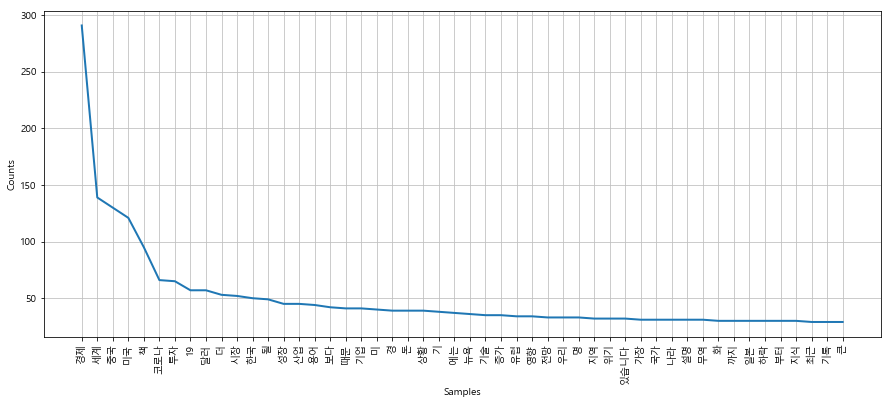

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [31]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [32]:
data = ko.vocab().most_common(300)

print(len(data))
data

300


[('경제', 291),
 ('세계', 139),
 ('중국', 130),
 ('미국', 121),
 ('책', 95),
 ('코로나', 66),
 ('투자', 65),
 ('19', 57),
 ('달러', 57),
 ('더', 53),
 ('시장', 52),
 ('한국', 50),
 ('될', 49),
 ('성장', 45),
 ('산업', 45),
 ('용어', 44),
 ('보다', 42),
 ('때문', 41),
 ('기업', 41),
 ('미', 40),
 ('경', 39),
 ('돈', 39),
 ('상황', 39),
 ('기', 38),
 ('에는', 37),
 ('뉴욕', 36),
 ('기술', 35),
 ('증가', 35),
 ('유럽', 34),
 ('영향', 34),
 ('전망', 33),
 ('우리', 33),
 ('명', 33),
 ('지역', 32),
 ('위기', 32),
 ('있습니다', 32),
 ('가장', 31),
 ('국가', 31),
 ('나라', 31),
 ('설명', 31),
 ('무역', 31),
 ('화', 30),
 ('까지', 30),
 ('일본', 30),
 ('하락', 30),
 ('부터', 30),
 ('지식', 30),
 ('최근', 29),
 ('기록', 29),
 ('큰', 29),
 ('해야', 28),
 ('그러나', 28),
 ('이후', 28),
 ('사회', 27),
 ('이나', 27),
 ('경찰', 27),
 ('생각', 26),
 ('그리고', 26),
 ('시작', 26),
 ('하기', 26),
 ('\n   ', 26),
 ('전쟁', 26),
 ('시대', 25),
 ('률', 25),
 ('상승', 25),
 ('나', 25),
 ('이해', 25),
 ('전략', 25),
 ('GDP', 24),
 ('되고', 24),
 ('간', 23),
 ('어떻게', 23),
 ('이야기', 23),
 ('내', 23),
 ('확산', 23),
 ('점', 23),
 ('감소', 22),

In [33]:
# list tuple을 딕셔너리로 만들어주는 함수
def todict(list_tuple):    
    todict = {}
    for i in range(0,len(list_tuple)):
        todict[data[i][0]] = data[i][1]
    return todict

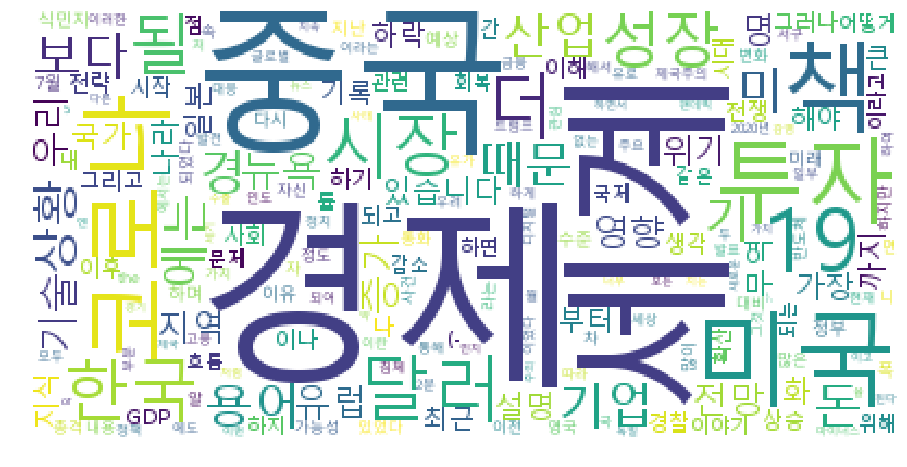

In [34]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(todict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()